# Partition of feature space by random forest

In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.datasets import load_boston, load_iris, load_wine, load_digits, \
                             load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score

import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
#%config InlineBackend.figure_format = 'svg'
%config InlineBackend.figure_format = 'retina'

from rfpimp import *   # pip install rfpimp

from sklearn import tree

import dtreeviz
print(dtreeviz.__version__)
from dtreeviz.trees import *
from dtreeviz import clfviz_bivar

1.3


## Decision tree and random forest for wine data set

In [2]:
wine = load_wine()
X = wine.data
X = X[:,[12,6]]
y = wine.target
len(X), len(y)

colors = {'classes':
          [None, # 0 classes
          None, # 1 class
          ["#FEFEBB","#a1dab4"], # 2 classes
          ["#FEFEBB","#D9E6F5",'#a1dab4'], # 3
          ]
         }

feature_c_bivar = ['proline','flavanoid']
target_c_bivar = "wine"
class_name_bivar = list(wine.target_names)
feature_c_bivar, target_c_bivar,  class_name_bivar

(['proline', 'flavanoid'], 'wine', ['class_0', 'class_1', 'class_2'])

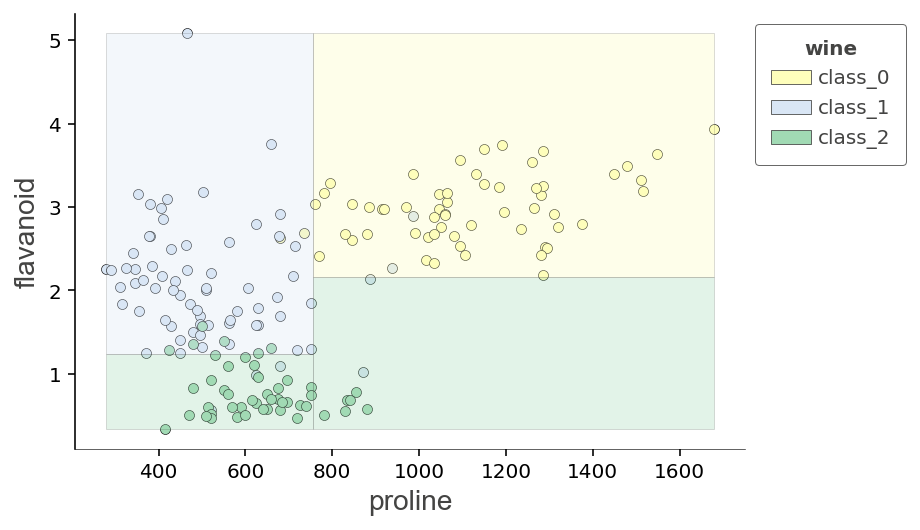

In [3]:
dtc_bivar = DecisionTreeClassifier(max_depth=2)
dtc_bivar.fit(X, y)

ctreeviz_bivar(dtc_bivar, X, y, 
               feature_names=feature_c_bivar, target_name=target_c_bivar, class_names=class_name_bivar,
               show={'splits', "legend"}, 
               colors={'scatter_edge': 'black'})

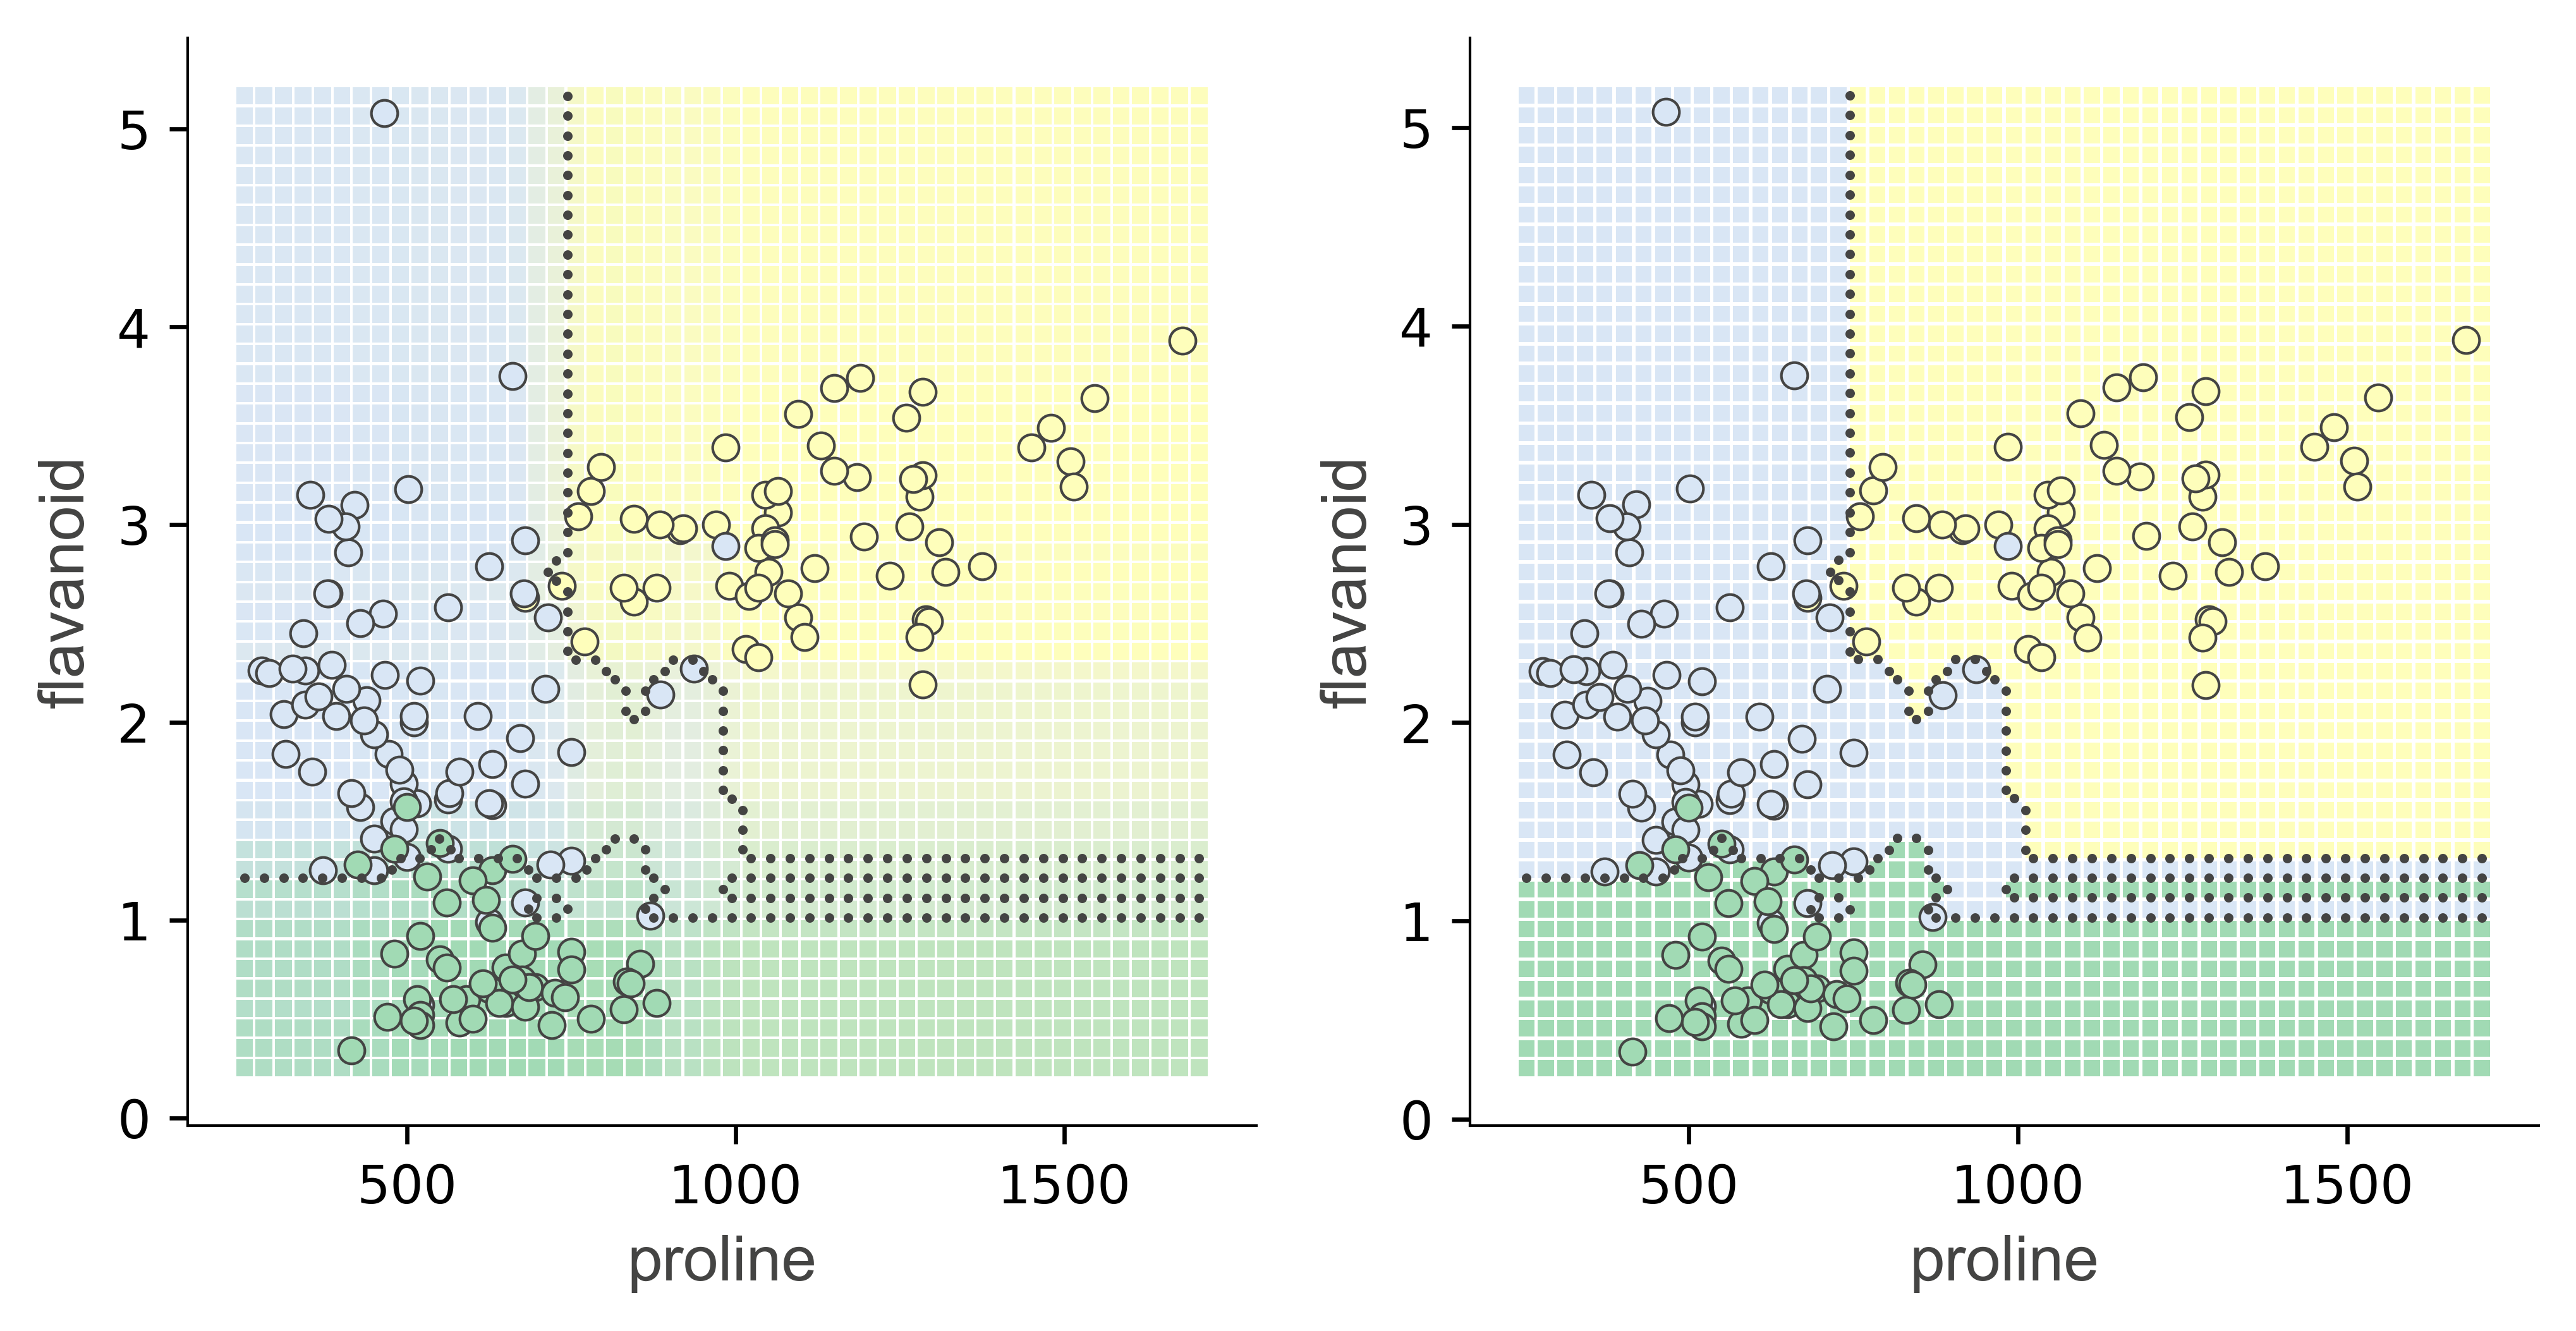

In [4]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=2, n_jobs=-1)
rf.fit(X, y)

fig,axes = plt.subplots(1,2, figsize=(8,3.8), dpi=300)
clfviz_bivar(rf, X, y, ntiles=50, ax=axes[0], tile_fraction=.9, show_proba=True, feature_names=['proline', 'flavanoid'])
clfviz_bivar(rf, X, y, ntiles=50, ax=axes[1], tile_fraction=.85, show_proba=False, feature_names=['proline', 'flavanoid'])
plt.show()

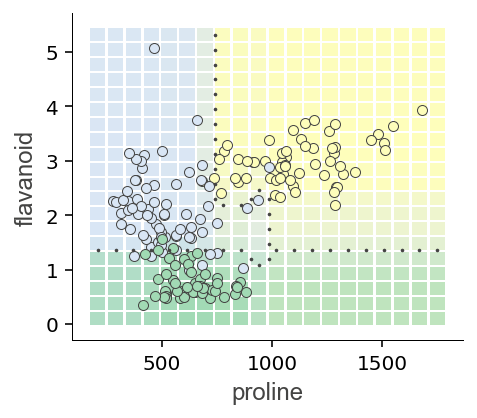

In [6]:
fig,ax = plt.subplots(1,1, figsize=(3.5,3))
clfviz_bivar(rf, X, y, ntiles=20, ax=ax, tile_fraction=.95, feature_names=['proline', 'flavanoid'])

In [ ]:
import pltvid

dpi = 300
camera = pltvid.Capture(dpi=dpi)
max = 10
for depth in range(1,max+1):
    t = DecisionTreeClassifier(max_depth=depth)
    t.fit(X,y)

    fig,ax = plt.subplots(1,1, figsize=(4,3.5), dpi=dpi)
    ctreeviz_bivar(t, X, y, 
                   feature_names=['proline', 'flavanoid'], target_name="wine",
                   show={'splits'},
                   colors={'scatter_edge': 'black',
                           'tesselation_alpha':.4},
                   ax=ax)
    plt.title(f"Wine tree depth {depth}")
    plt.tight_layout()
    if depth>=max:
        camera.snap(8)
    else:
        camera.snap()
    # plt.show()

camera.save("/tmp/wine-dtree-maxdepth.png", duration=500)

## Titantic

In [7]:
df = pd.read_csv("../data/titanic/titanic.csv")
df['Sex'] = np.where(df['Sex']=='male', 0, 1)
df.head(2).T

,0,1
PassengerId,1,2
Survived,0,1
Pclass,3,1
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,0,1
Age,22,38
SibSp,1,1
Parch,0,0
Ticket,A/5 21171,PC 17599
Fare,7.25,71.2833


In [8]:
X, y = df.drop(['Survived','Name','Ticket','Cabin','Embarked'], axis=1), df['Survived']
X['Age_na'] = X['Age'].isna()
X['Age'] = X['Age'].fillna(X['Age'].median(skipna=True))

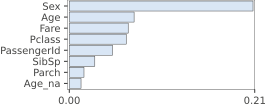

In [9]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

I = importances(rf, X, y)
plot_importances(I)

In [10]:
X = X[['Age','Fare']]
rf = RandomForestClassifier(n_estimators=10, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(n_estimators=10, n_jobs=-1)

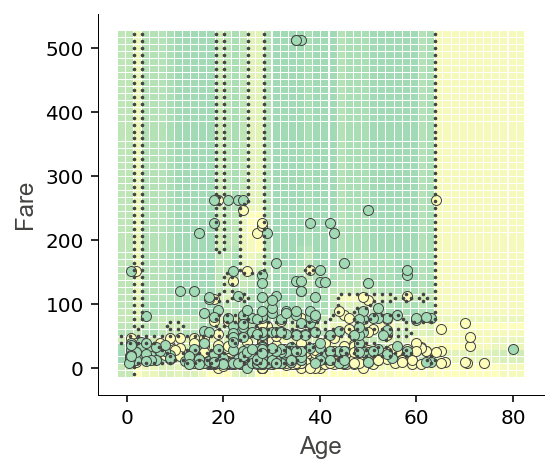

In [12]:
clfviz_bivar(rf, X.values, y, ntiles=50, feature_names=['Age','Fare'])

## Cancer

In [13]:
cancer = load_breast_cancer()

df = pd.DataFrame(data=cancer.data)
df.columns = [f'f{i}' for i in range(df.shape[1])]
df['y'] = cancer.target
df.head(3)

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f21,f22,f23,f24,f25,f26,f27,f28,f29,y
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [14]:
X, y = df.drop('y',axis=1), df['y']

In [15]:
rf = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, n_jobs=-1)
rf.fit(X, y)

I = importances(rf, X, y)[0:5]

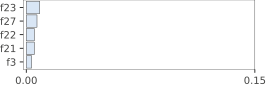

In [16]:
plot_importances(I)

In [17]:
X = df[['f27','f22']]

rf = RandomForestClassifier(n_estimators=30, min_samples_leaf=5, n_jobs=-1)
rf.fit(X, y)

RandomForestClassifier(min_samples_leaf=5, n_estimators=30, n_jobs=-1)

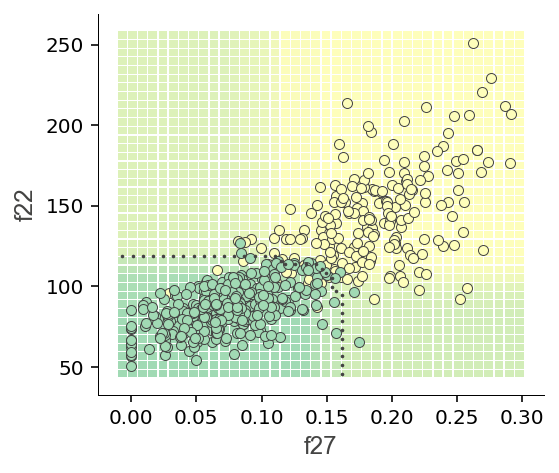

In [18]:
clfviz_bivar(rf, X.values, y, feature_names=['f27', 'f22'], ntiles=40)

## Synthetic data sets

In [19]:
def smiley(n = 1000):
    # mouth
    x1 = np.random.normal(1.0,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.4,.05,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=0, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = d
    
    # left eye
    x1 = np.random.normal(.7,.2,n).reshape(-1,1)
#     x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=1, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # right eye
    x1 = np.random.normal(1.3,.2,n).reshape(-1,1)
    x2 = np.random.normal(0.8,.1,n).reshape(-1,1)
    x2 = x1 - .5 + .3 + np.random.normal(0,.1,n).reshape(-1,1)
    cl = np.full(shape=(n,1), fill_value=2, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    # face outline
    noise = np.random.normal(0,.1,n).reshape(-1,1)
    x1 = np.linspace(0,2,n).reshape(-1,1)
    x2 = (x1-1)**2 + noise
    cl = np.full(shape=(n,1), fill_value=3, dtype=int)
    d = np.hstack([x1,x2,cl])
    data = np.vstack([data, d])

    df = pd.DataFrame(data, columns=['x1','x2','class'])
    return df

Test we get 4 classes in a smiley face:

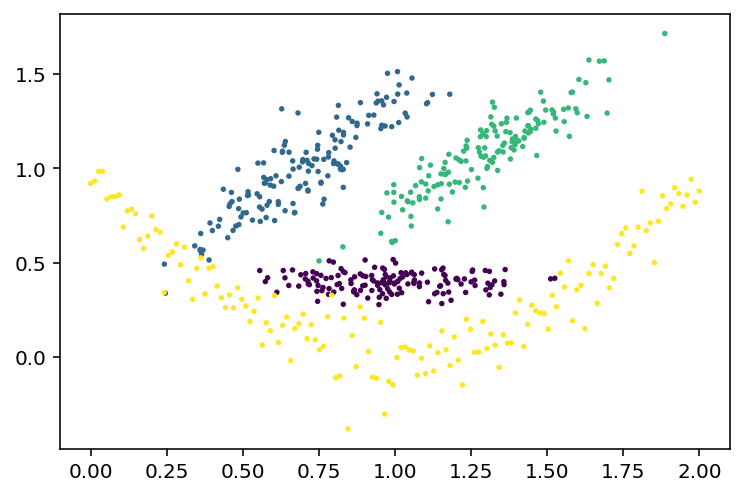

In [20]:
df = smiley(n=150)
plt.scatter(df.x1,df.x2,s=3,c=df['class'])

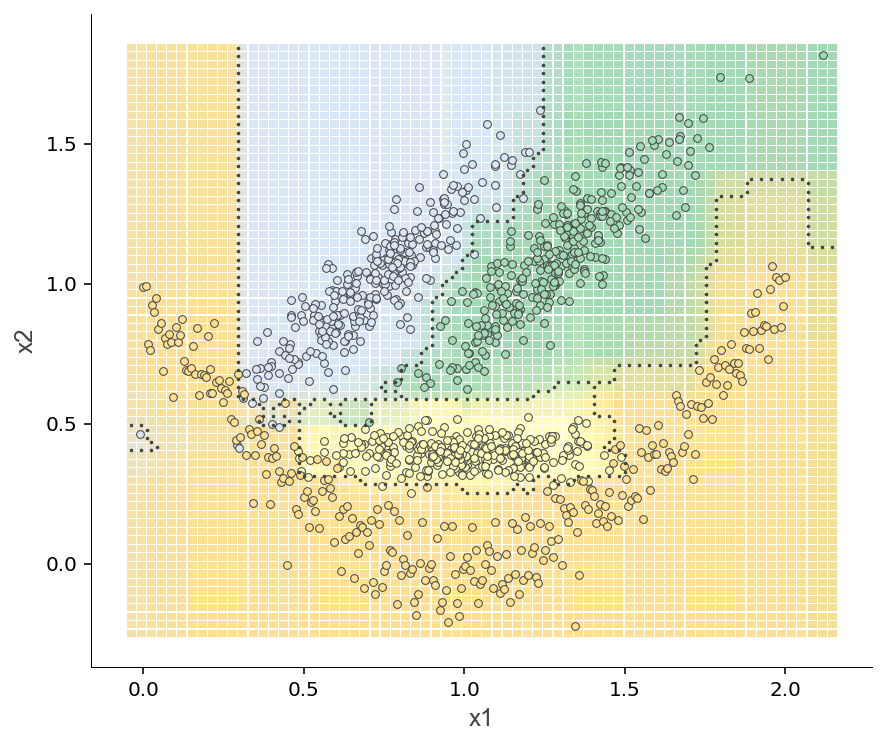

In [22]:
df = smiley(n=300)
X = df[['x1','x2']]
y = df['class']
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, n_jobs=-1)
rf.fit(X, y)

fig,ax = plt.subplots(1,1,figsize=(7,6))
clfviz_bivar(rf, X.values, y, feature_names=['x1', 'x2'], ntiles=70, dot_w=15, ax=ax)

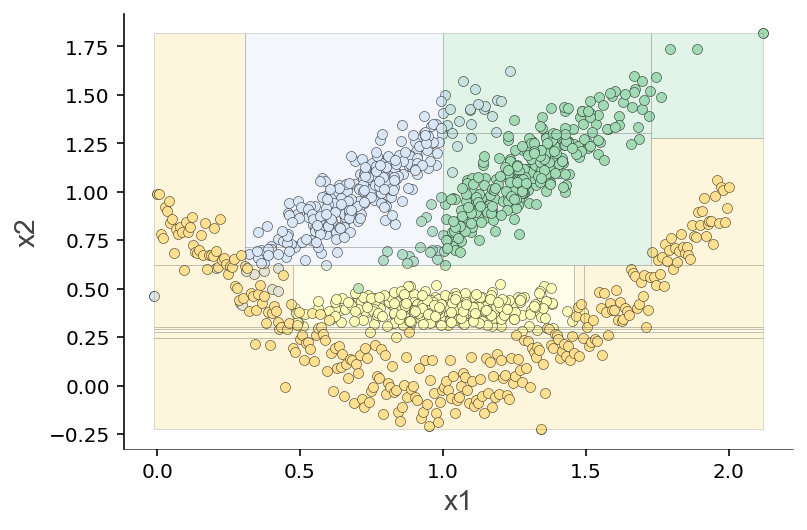

In [23]:
t = DecisionTreeClassifier(max_depth=4)
t.fit(X,y)
ctreeviz_bivar(t, X, y, 
               feature_names=['x1', 'x2'], target_name="class",
               show={'splits'},
               colors={'scatter_edge': 'black'})

### Animate num trees in RF

In [ ]:
import pltvid

df = smiley(n=100)
X = df[['x1','x2']]
y = df['class']
rf = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, n_jobs=-1)
rf.fit(X, y)

dpi = 300
camera = pltvid.Capture(dpi=dpi)
max = 100
tree_sizes = [*range(1,10)]+[*range(10,max+1,5)]
for nt in tree_sizes:
    np.random.seed(1) # use same bagging sets for animation
    rf = RandomForestClassifier(n_estimators=nt, min_samples_leaf=1, n_jobs=-1)
    rf.fit(X, y)

    fig,ax = plt.subplots(1,1, figsize=(3,2.8), dpi=dpi)
    crfviz_bivar(rf, X.values, y, feature_names=['x1', 'x2'],
                 ntiles=70, dot_w=15, boundary_markersize=.4, ax=ax)
    plt.title(f"Synthetic dataset, {nt} trees")
    plt.tight_layout()
    if nt>=tree_sizes[-1]:
        camera.snap(5)
    else:
        camera.snap()
    # plt.show()

camera.save("/tmp/smiley-numtrees.png", duration=500)

### Animate decision tree max depth

In [ ]:
import pltvid

df = smiley(n=100) # more stark changes with fewer
X = df[['x1','x2']]
y = df['class']

dpi = 300
camera = pltvid.Capture(dpi=dpi)
max = 10
for depth in range(1,max+1):
    t = DecisionTreeClassifier(max_depth=depth)
    t.fit(X,y)

    fig,ax = plt.subplots(1,1, figsize=(4,3.5), dpi=dpi)
    ctreeviz_bivar(t, X, y, 
                   feature_names=['x1', 'x2'], target_name="class",
                   show={'splits'},
                   colors={'scatter_edge': 'black',
                           'tesselation_alpha':.6},
                   ax=ax)
    plt.title(f"Synthetic dataset, tree depth {depth}")
    plt.tight_layout()
    if depth>=max:
        camera.snap(8)
    else:
        camera.snap()
    # plt.show()

camera.save("/tmp/smiley-dtree-maxdepth.png", duration=500)

### Animate decision tree min samples per leaf

In [ ]:
import pltvid

df = smiley(n=100)
X = df[['x1','x2']]
y = df['class']

dpi = 300
camera = pltvid.Capture(dpi=dpi)
max = 20
for leafsz in range(1,max+1):
    t = DecisionTreeClassifier(min_samples_leaf=leafsz)
    t.fit(X,y)

    fig,ax = plt.subplots(1,1, figsize=(4,3.5), dpi=dpi)
    ctreeviz_bivar(t, X, y, 
                   feature_names=['x1', 'x2'], target_name="class",
                   show={'splits'},
                   colors={'scatter_edge': 'black',
                           'tesselation_alpha':.4},
                   ax=ax)
    plt.title(f"Synthetic dataset, {leafsz} samples/leaf")
    plt.tight_layout()
    if leafsz>=max:
        camera.snap(8)
    else:
        camera.snap()
    # plt.show()

camera.save("/tmp/smiley-dtree-minsamplesleaf.png", duration=500)